In [8]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import librosa

In [161]:

def plot_figures_single(data):
    plt.figure()
    fig,axes=plt.subplots(10,1,figsize=(20, 20))
    for index in range(10):
        axes[index].plot(data[:,index],label='data')
        # axes[index].plot(predict[:,index],label='predict')
        
        axes[index].legend()

    plt.show()
def plot_figures(data,predict):
    plt.figure()
    fig,axes=plt.subplots(10,1,figsize=(20, 20))
    for index in range(10):
        axes[index].plot(data[:,index],label='data')
        axes[index].plot(predict[:,index],label='predict')
        
        axes[index].legend()

    plt.show()
def eucli_distance(X,Y):
    
    a=np.matmul((X)**2,(np.ones((Y.conj().T).shape)))
    b=np.matmul(np.ones(Y.shape),((X)**2).conj().T)
    c=np.matmul(X,Y.conj().T)
    k=a+b-2*c
    k[k<0]=0
    res=np.sqrt(k)
    res[np.isnan(res)] = 0
    
    return res
def sbm(D,data):
## D state_vector
    G=eucli_distance(D,D)
    G_inv=np.linalg.inv(G)


    result=[]
    for da in data:
        sv=eucli_distance(D,da)
        
        w_0=np.matmul(G_inv,sv)
        w=w_0/np.sum(w_0)
        res=np.matmul(D.T,w)

        result.append(res)
    result=np.array(result)
    # for i in range(10):
    #     Min=np.min(D[:,i])
    #     idx=np.abs(result[:,i])>np.max(D[:,i])
    #     result[idx,i]=Min
      
    return  result,G
    


In [179]:
data=pd.read_csv("Reference Data.csv")
df=np.array(data)[1:,1:]
D=np.array(df[100:3000],dtype=float)
da=np.array(df,dtype=float)

In [180]:

predict,G=sbm(D,da[:100])
res=np.abs(predict-da[:100])/da[:100]
res_rate=np.mean(res)

<Figure size 432x288 with 0 Axes>

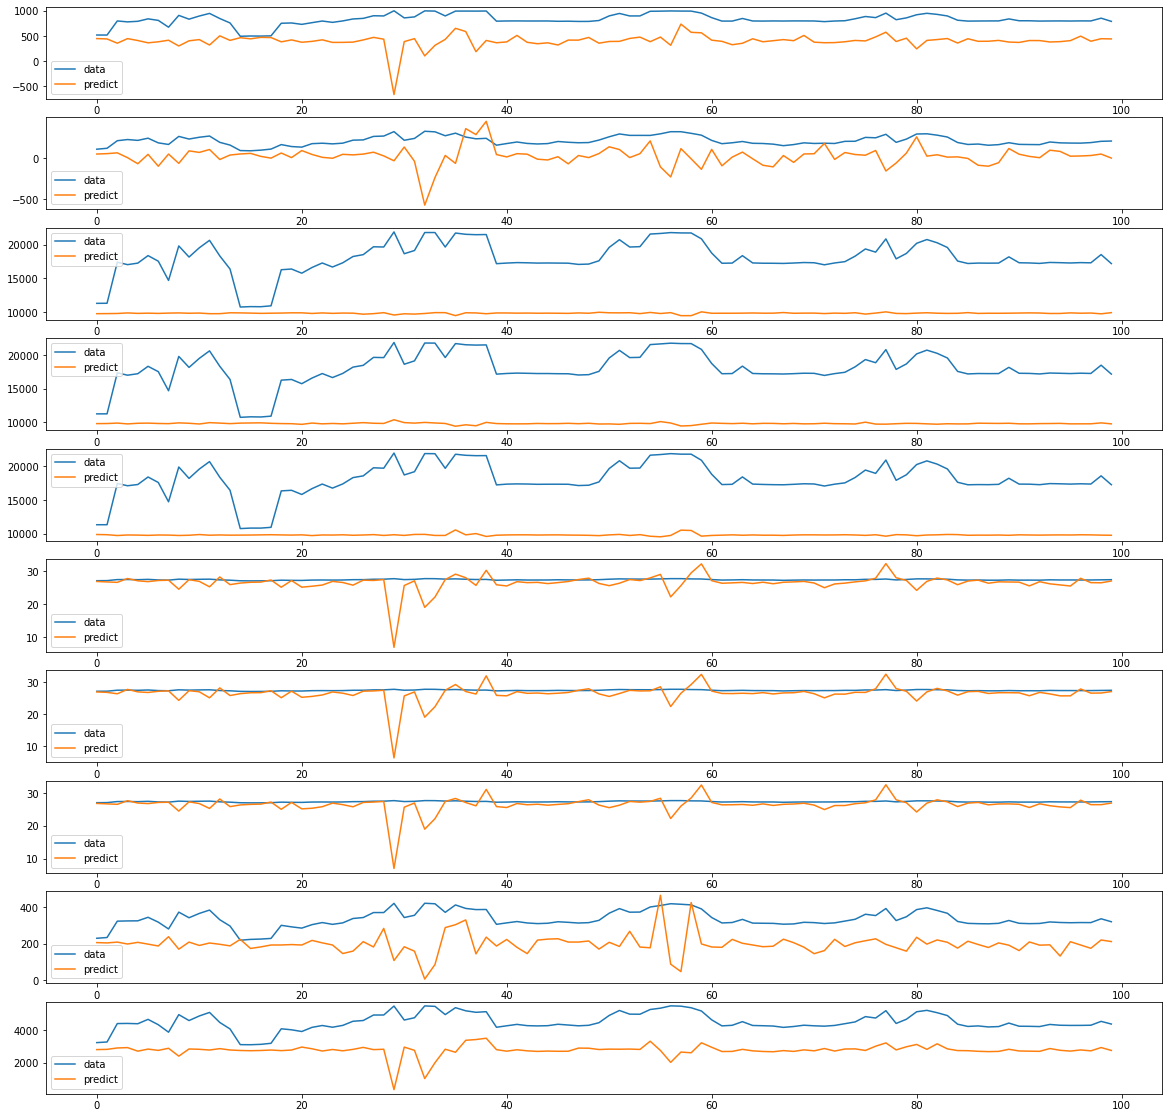

In [181]:
plot_figures(da[:100],predict)